In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [47]:
train = pd.read_csv('titanic_train.csv')
test = pd.read_csv('titanic_test.csv')

In [48]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


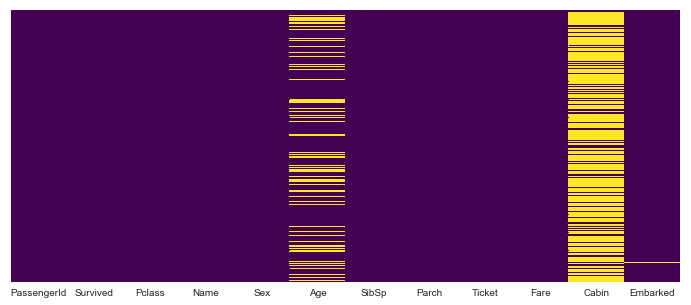

In [49]:
#isnull retorna true quando temos um valor null, podemos observar que possuimos poucos valores de cabine e idade
plt.figure(figsize=(12,5))
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

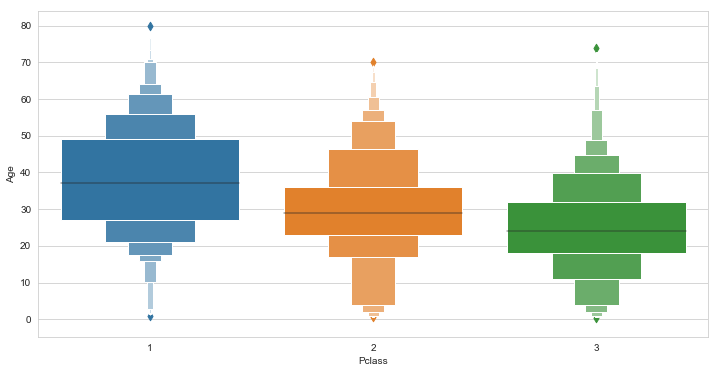

In [50]:
plt.figure(figsize=(12,6))
sns.boxenplot(x='Pclass', y='Age', data=train)

In [51]:
#INSERIR DADOS NOS VALORES NULL COM BASE NA MEDIA DA CLASSE
def inputar_idade(cols):
    Idade = cols[0]
    Classe = cols[1]
    
    if pd.isnull(Idade):
        if Classe == 1:
            #visto no grafico acima
            return 37
        elif Classe == 2:
            return 29
        else:
            return 24
    else:
        return Idade

train['Age'] = train[['Age', 'Pclass']].apply(inputar_idade, axis=1)

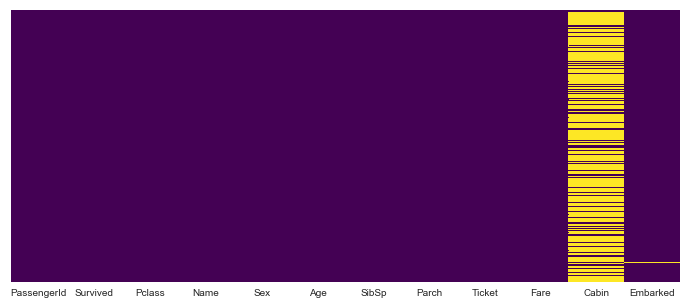

In [52]:
plt.figure(figsize=(12,5))
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [53]:
#deletar a coluna CABIN 
del train['Cabin']

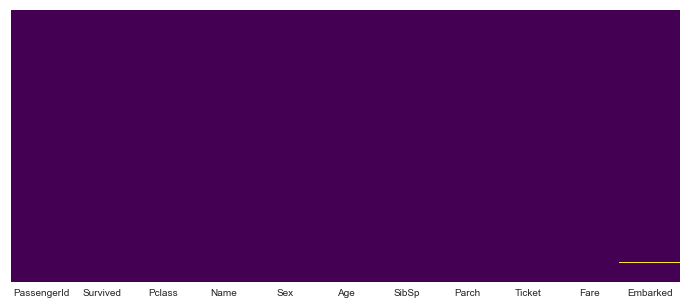

In [54]:
plt.figure(figsize=(12,5))
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

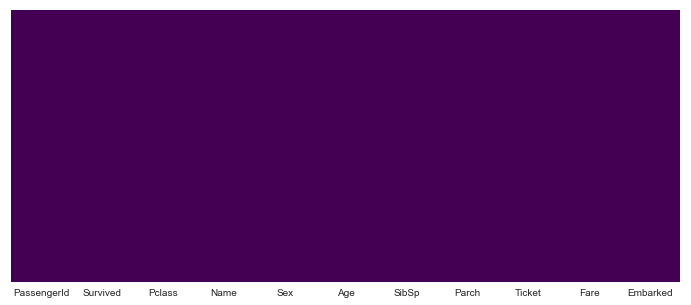

In [55]:
#substituir o value null de Embarked 
train.dropna(inplace=True)

plt.figure(figsize=(12,5))
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

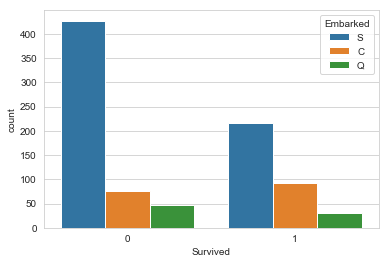

In [56]:
sns.countplot(x='Survived', data=train, hue='Embarked')

In [57]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


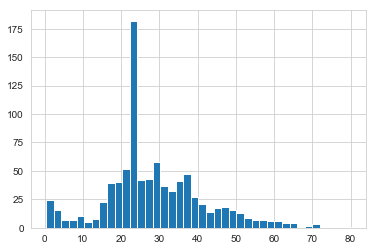

In [58]:
train['Age'].hist(bins=40)

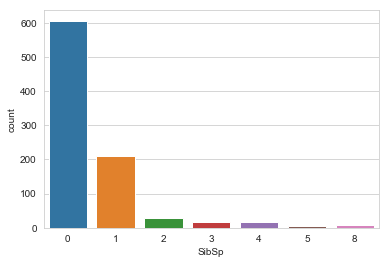

In [59]:
sns.countplot(x='SibSp', data=train)

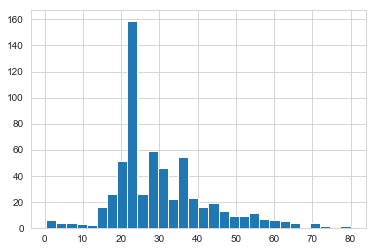

In [60]:
train[train['SibSp'] == 0]['Age'].hist(bins=30)

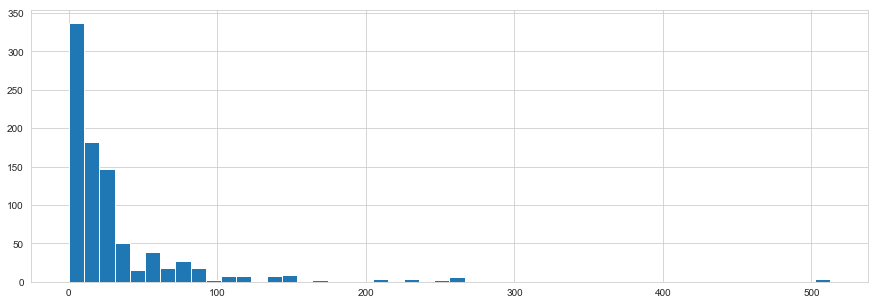

In [61]:
train['Fare'].hist(bins=50, figsize=(15,5))

# TRATANDO O MODELO:

In [63]:
#fazendo dados categóricos serem dados de estudo
sex = pd.get_dummies(train['Sex'],drop_first=True)  # drop_first=True > Para evitar a multi-colinaridade
embark = pd.get_dummies(train['Embarked'],drop_first=True)

#removendo os dados que não podem ser trabalhados
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

#concatenando os dados
train = pd.concat([train,sex,embark],axis=1)

#view
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


# Regressão

In [65]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [67]:
X_train, X_test, Y_train, Y_test = train_test_split(train.drop('Survived', axis=1), train['Survived'], test_size=0.3)

logmodel = LogisticRegression()

logmodel.fit(X_train, Y_train)

C:\Users\Aevo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [68]:
predictions = logmodel.predict(X_test)

In [70]:
from sklearn.metrics import classification_report

print(classification_report(Y_test, predictions))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86       156
           1       0.83      0.75      0.79       111

   micro avg       0.83      0.83      0.83       267
   macro avg       0.83      0.82      0.82       267
weighted avg       0.83      0.83      0.83       267



In [71]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(Y_test, predictions))

[[139  17]
 [ 28  83]]
